# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A few types of classification problems:
* Binary classification
* Mutliclass classification
* Multilabel classification

See full course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf

## Create Data to view and fit

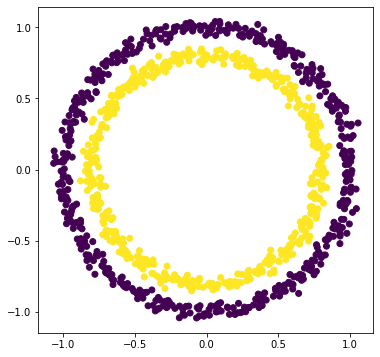

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=0)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
np.unique(y, return_counts=True) # as many 0 than 1

(array([0, 1]), array([500, 500]))

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak 
6. Evaluate...

## First Model

In [ ]:
tf.random.set_seed(0)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="sgd",
                metrics=["accuracy"])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.fit(X, y, epochs=100, verbose=False)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


[7.624619007110596, 0.5]

our model performe poorly => 50% in a classification pb it's just guessing
=> see the decision boundary

## Decision boundary

In [ ]:
x1 = np.arange(1, 5) # [1 , 2, 3, 4]
x2 = np.arange(5, 8) # [5, 6, 7]
xx, yy = np.meshgrid(x1,x2)
print(xx, "\n\n", yy)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]] 

 [[5 5 5 5]
 [6 6 6 6]
 [7 7 7 7]]


![meshgrid](https://i.stack.imgur.com/8Mbig.png)

In [ ]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
np.c_[xx, yy]

array([[1, 2, 3, 4, 5, 5, 5, 5],
       [1, 2, 3, 4, 6, 6, 6, 6],
       [1, 2, 3, 4, 7, 7, 7, 7]])

In [ ]:
xx.ravel()

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [ ]:
np.c_[xx.ravel(), yy.ravel()] # use to predict => every combinaison between `x1` and `x2`

array([[1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [1, 6],
       [2, 6],
       [3, 6],
       [4, 6],
       [1, 7],
       [2, 7],
       [3, 7],
       [4, 7]])

In [ ]:
# for multi-class (here 3 class)
np.argmax([[0, 0.1, 0.9],
           [0.2, 0.7, 0.1]], axis=1)

array([2, 1])

In [ ]:
def plot_decision_boundary(model, X, y, subdiv=100, figsize=None):
    min_x1, max_x1 = np.min(X[:,0]), np.max(X[:,0])
    min_x2, max_x2 = np.min(X[:,1]), np.max(X[:,1])
    x1 = np.linspace(min_x1, max_x1, subdiv)
    x2 = np.linspace(min_x2, max_x2, subdiv)

    xx, yy = np.meshgrid(x1, x2)
    all_combinaison = np.c_[xx.ravel(), yy.ravel()]
    
    y_pred = model.predict(all_combinaison)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        # keep the hightest predict value ie keep the class predicted
        y_pred = np.argmax(y_pred, axis=1)
    else:
        # if pred : 0.4->0
        # if pred : 0.6->1
        # ie keep the class predicted
        y_pred = np.round(y_pred) 

    # reshape as a grid
    y_pred_grid = y_pred.reshape(xx.shape) # yy same shape

    # Plot the decision boundary
    if figsize is not None :
        plt.figure(figsize=figsize)
    plt.contourf(xx, yy, y_pred_grid, alpha=0.7, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.axis(False)

In [ ]:
def plot_decisions_boundary(models, datas, subdiv=100):
    n = len(models)
    plt.figure(figsize=(8*n, 6))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plot_decision_boundary(models[i], datas[i][0], datas[i][1], subdiv=subdiv)

313/313 [==============================] - 1s 2ms/step


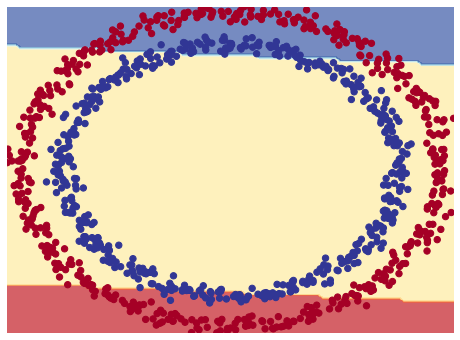

In [ ]:
plot_decision_boundary(model_1, X, y, figsize=(8,6))

## Improving model

our first model was linear but the probleme is not => use hiden layers and change the activation to "relu" for hiden layers and sigmoid for output layers:

if input : x1 and x2 => $Z = w_1 \cdot x_1 + w_2 \cdot x_2 + b$ <br>

Activation `sigmoid` : $A = {1 \over 1 + e^{-Z}}$

Activation `relu` : $A = max(0, Z)$

**Last layer :**
<br>
Which `Ativation` ? <br>
Which `Loss` ?

<br>

Binary Classification (dog or cat)  | Multi-class Classification (which dog breeds)
-------------------|------------------
**Activation** : Sigmoid             | **Activation** : Softmax
**Loss** : Binary Crossentropy       | **Loss** : Categorical Crossentropy

<br><br>

### `Sigmoid` and `relu` functions

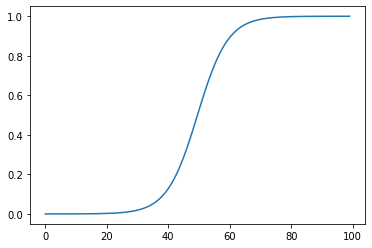

In [ ]:
# Graph sigmoid
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

Z = np.linspace(-10, 10, 100)
plt.plot(sigmoid(Z))

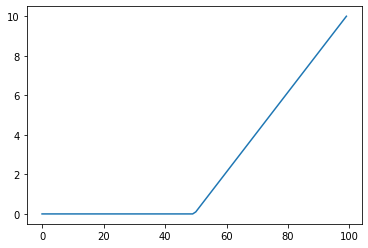

In [ ]:
# Graph relu 
def relu(Z):
    return np.maximum(0, Z)

Z = np.linspace(-10, 10, 100)
plt.plot(relu(Z))

### new model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
tf.random.set_seed(0)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu", input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=False)
scores_2 = model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.7800


313/313 [==============================] - 0s 1ms/step


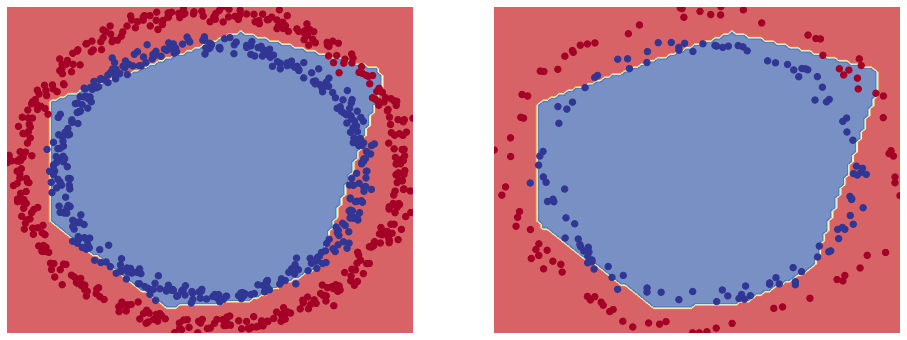

In [ ]:
models = [model_2]*2
datas = [[X_train, y_train], [X_test, y_test]]
plot_decisions_boundary(models, datas);

### Add more hiden layers

In [ ]:
tf.random.set_seed(0)

model_3 = tf.keras.Sequential([
     # all activation (relu and sigmoid) are important
    tf.keras.layers.Dense(64, activation="relu", input_shape=(2,)), # feature : 2 => x1 and x2
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # 1/(1+epx(-z)) where z=w1*x1 + w2*x2 + b
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="sgd",
                metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=300, verbose=False)
scores_3 = model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000


313/313 [==============================] - 0s 1ms/step


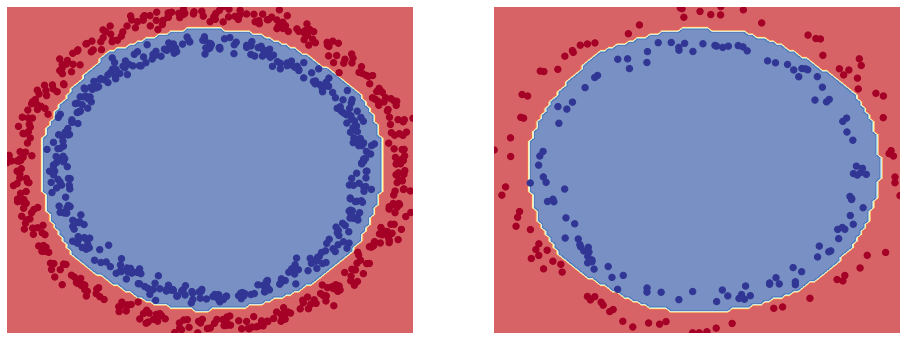

In [ ]:
models = [model_3]*2
datas = [[X_train, y_train], [X_test, y_test]]
plot_decisions_boundary(models, datas)

## Plotting history

In [192]:
def plot_history(history, zoom=0):
    df = pd.DataFrame(history.history)
    n = len(df.columns)

    row = 1 if n<=3 else n//2
    col = n if n<=3 else n//2 + n%2

    plt.figure(figsize=(5*(col+1) + zoom , 5*row + zoom))
    for i, column in enumerate(df.columns):
        plt.subplot(row, col+1, i+1)
        plt.plot(df[f"{column}"], label=f"{column}")
        plt.legend()
        plt.xlabel("epochs")
        plt.ylabel(f"{column}")
        plt.tight_layout(pad=2) # padding
    
    plt.subplot(row, col+1, n+1)
    for column in df.columns:
        plt.plot(df[f"{column}"], label=f"{column}")
        plt.legend()
    plt.xlabel("epochs")

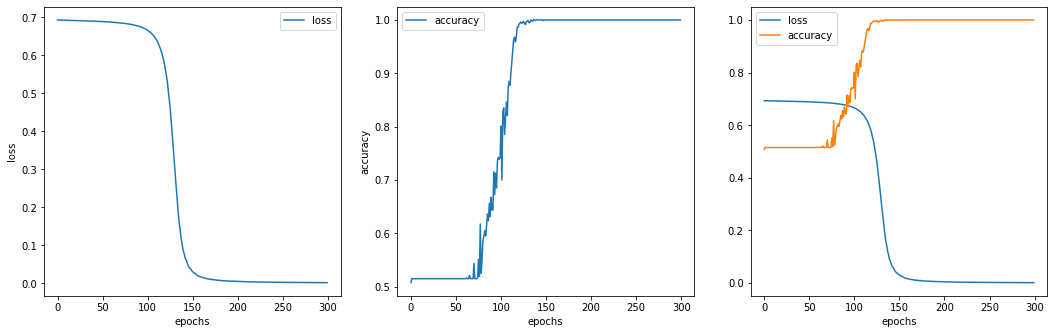

In [193]:
plot_history(history_3)

## Finding the best learning rate

To find the ideal learning rate (when the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** .
* Another model (we could use the same one as above)
* A modified loss curves plot.

new model is gonna be the same as `model_2` 


In [ ]:
tf.random.set_seed(0)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu", input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_4 = model_4.fit(X_train, y_train, 
                        epochs=100, 
                        callbacks=[lr_scheduler], 
                        verbose=False)

scores_4 = model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 1.2665 - accuracy: 0.5600


`LearningRateScheduler` : At the beginning of every epoch, this callback gets the updated learning rate
value from schedule function provided at `__init__`, with the current epoch
and current learning rate, and applies the updated learning rate
on the optimizer.

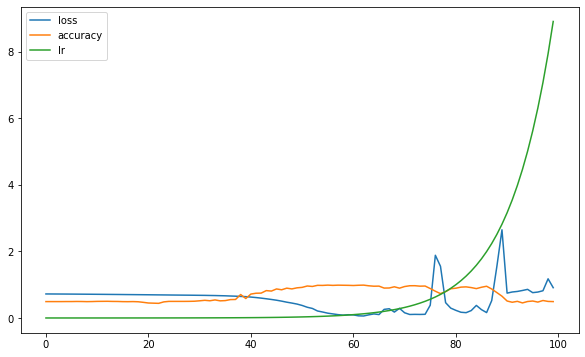

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(10,6))

### plot `learning_rate` **VS**  `loss`

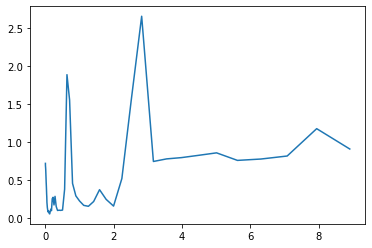

In [ ]:
lr = 1e-4 * 10**(np.arange(100)/20)
df = pd.DataFrame(history_4.history)
plt.plot(lr, df.loss)

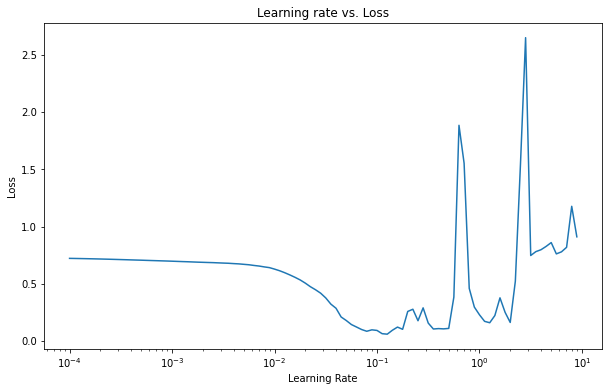

In [ ]:
lr = 1e-4 * 10**(np.arange(100)/20)
df = pd.DataFrame(history_4.history)
plt.figure(figsize=(10,6))
plt.semilogx(lr, df.loss)
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

**best learning rate is reached when loss decreases but not flatten yet**

In [ ]:
# best learning rate is reached when loss decreases but not flatten yet

df_lr = df[df.lr < 1e-1]

min_loss_index = np.argmin(df_lr.loss)
best_lr = df_lr.lr[min_loss_index]
best_lr

0.07943282

### Try with the 'best' learing rate

In [ ]:
tf.random.set_seed(0)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu", input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                metrics=["accuracy"])

history_5 = model_5.fit(X_train, y_train, epochs=100, verbose=False)
scores_5 = model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9950


#### Comparing graph

313/313 [==============================] - 0s 1ms/step


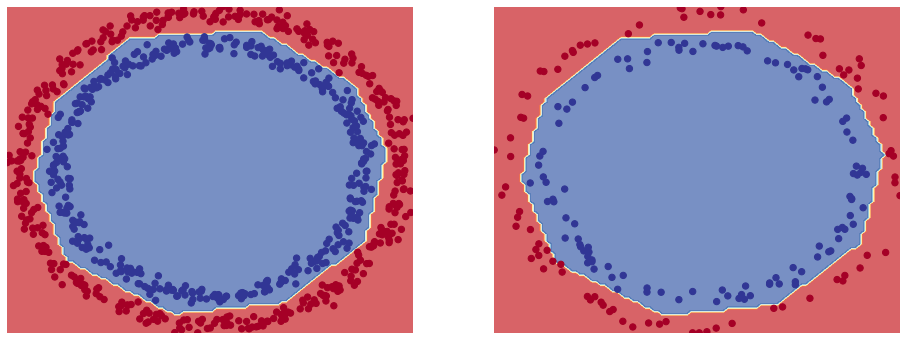

In [ ]:
models = [model_5]*2
datas = [[X_train, y_train], [X_test, y_test]]
plot_decisions_boundary(models, datas)

313/313 [==============================] - 0s 1ms/step


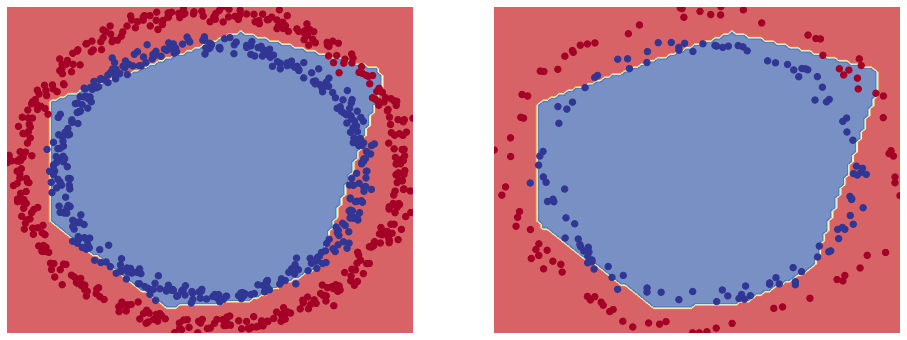

In [ ]:
models = [model_2]*2
datas = [[X_train, y_train], [X_test, y_test]]
plot_decisions_boundary(models, datas)

#### Comparing loss_curve

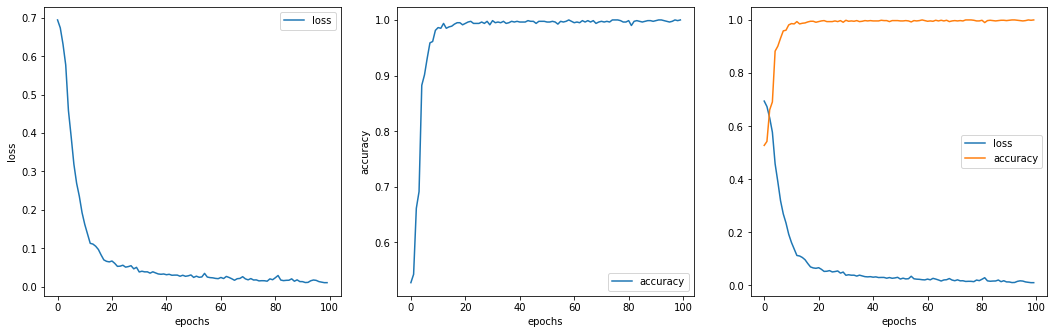

In [194]:
plot_history(history_5)

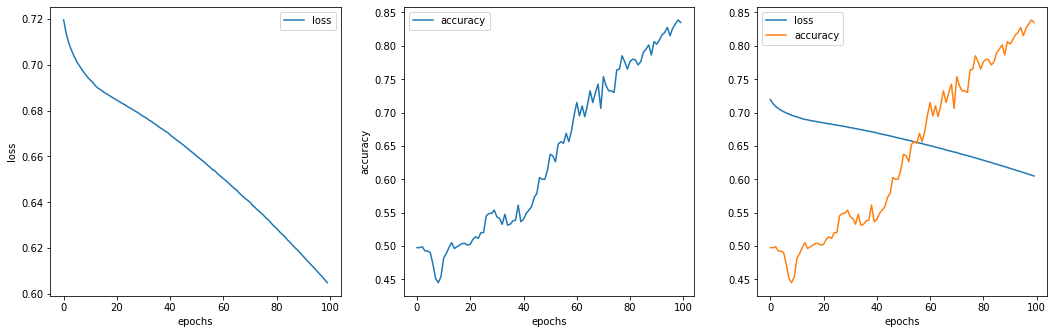

In [195]:
plot_history(history_2)

#### Comparing accuracy score 

In [ ]:
scores = [["lr=0.001", scores_2[1]],
          [f"best_lr={best_lr:.3f}", scores_5[1]]]
pd.DataFrame(scores, columns=["lr_values", "scores_values"])

,lr_values,scores_values
0,lr=0.001,0.780
1,best_lr=0.079,0.995


#### What happen whith more `epochs` for model_2

In [ ]:
tf.random.set_seed(0)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu", input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(X_train, y_train, epochs=600, verbose=False)
scores_6 = model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 0.9950


313/313 [==============================] - 1s 3ms/step


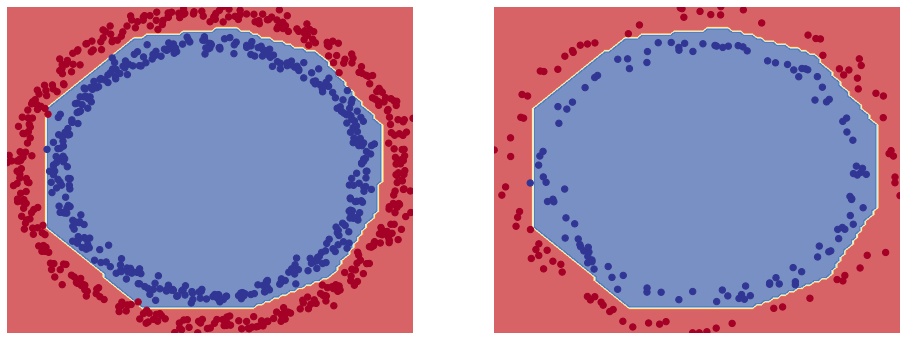

In [ ]:
models = [model_6]*2
datas = [[X_train, y_train], [X_test, y_test]]
plot_decisions_boundary(models, datas)

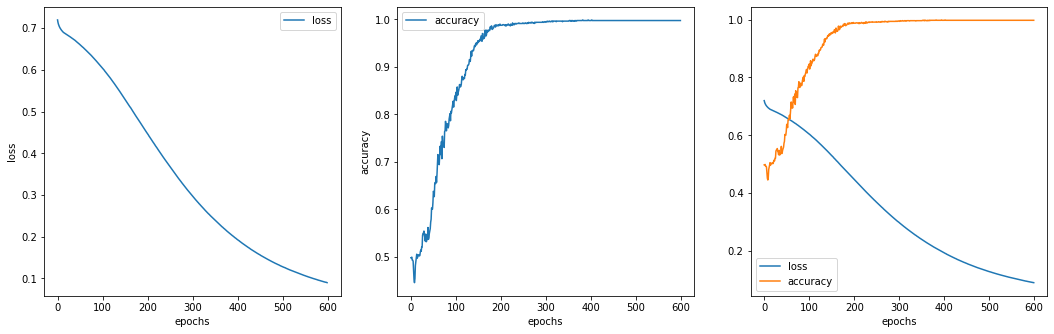

In [196]:
plot_history(history_6)

In [ ]:
scores = [["lr=0.001","epochs=100" ,scores_2[1]],
          ["lr=0.001","epochs=100" ,scores_6[1]],
          [f"best_lr={best_lr:.3f}","epochs=600" ,scores_5[1]]]
pd.DataFrame(scores, columns=["lr_values","epochs_values" ,"scores_values"])

,lr_values,epochs_values,scores_values
0,lr=0.001,epochs=100,0.780
1,lr=0.001,epochs=100,0.995
2,best_lr=0.079,epochs=600,0.995


learning rate of 0.001 and epochs=600 work well, but need more time

#### Test with `tanh` activation

$tanh = { e^Z - e^{-Z} \over e^Z + e^{-Z} } $

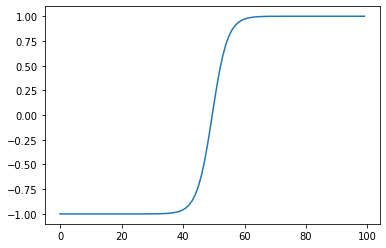

In [ ]:
def tanh(Z):
    return (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))

Z = np.linspace(-10, 10, 100)
plt.plot(tanh(Z))

313/313 [==============================] - 0s 1ms/step


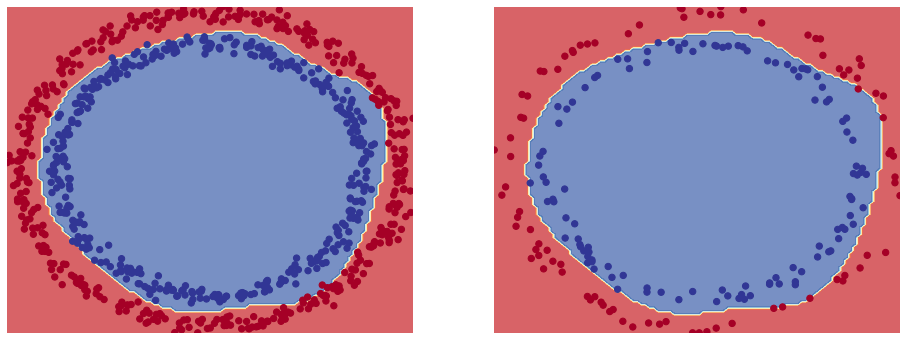

In [ ]:
tf.random.set_seed(0)

model_tanh = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="tanh", input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                metrics=["accuracy"])

history_tanh = model_tanh.fit(X_train, y_train, epochs=100, verbose=False)

model_tanh.evaluate(X_test, y_test)

models = [model_tanh]*2
datas = [[X_train, y_train], [X_test, y_test]]
plot_decisions_boundary(models, datas)

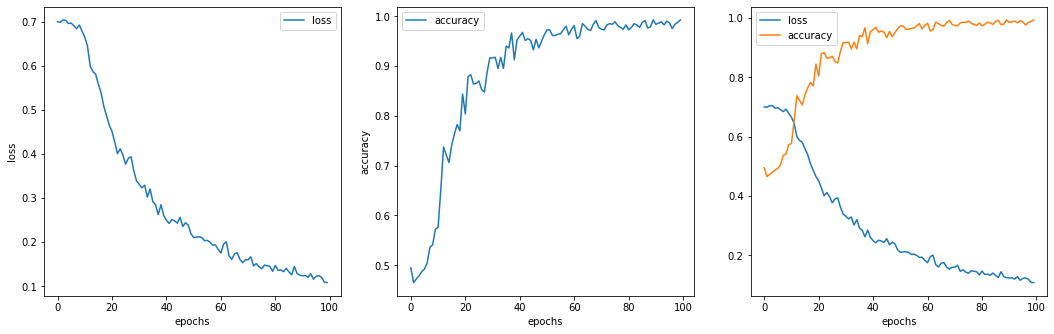

In [197]:
plot_history(history_tanh)

**`tanh` activation perform very well compare to `relu` activation (same hidden layers/ epochs / optimizer)**

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision 
* Recall
* F1-score
* Confusion matrix
* [Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) (from scikit-learn)

**First lets check the confusion matrix?**

In [ ]:
y_pred = model_2.predict(X_test)
y_pred[:5] # => proba

7/7 [==============================] - 0s 2ms/step


array([[0.45012623],
       [0.51715785],
       [0.4485812 ],
       [0.5019405 ],
       [0.54763454]], dtype=float32)

In [ ]:
y_pred = tf.round(y_pred)
y_pred[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[82,  6],
       [38, 74]])

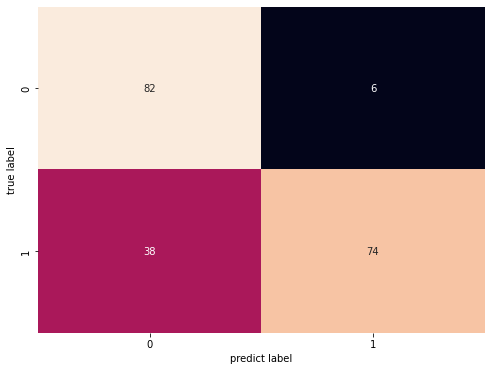

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cbar=False);
plt.xlabel("predict label")
plt.ylabel("true label");

In [294]:
def plot_confusion_matrix(cf_matrix, cmap="Accent_r", cbar=False, figsize=None):

    n = len(cf_matrix)
    size = np.sum(cf_matrix)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = [f"{value:.0f}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2%}" for value in (cf_matrix/np.sum(cf_matrix,axis=1)).flatten()]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.array(labels).reshape(n,n)

    if figsize is not None : 
        plt.figure(figsize=figsize)
    ax = sns.heatmap(cf_matrix, annot=labels, cmap=cmap, cbar=cbar, fmt="")

    ax.set_title(f'Confusion Matrix, size:{size} \n', weight="bold", fontsize="xx-large");
    ax.set_xlabel('\n Predicted Values', weight="bold", fontsize="x-large")
    ax.set_ylabel('True Values ', weight="bold", fontsize="x-large");

    ax.xaxis.set_ticklabels(['False','True'], weight="bold")
    ax.yaxis.set_ticklabels(['False','True'], weight="bold")

    plt.show()

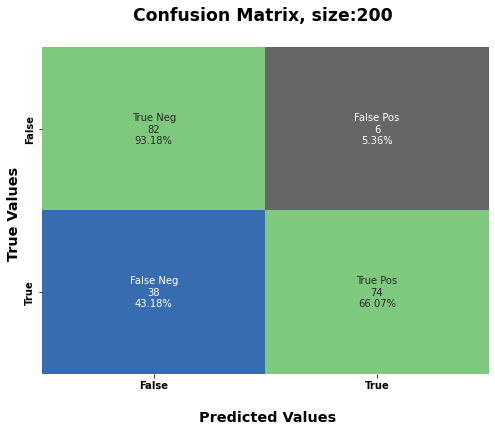

In [295]:
plot_confusion_matrix(cf_matrix, figsize=(8,6))

# Working with a larger example (multiclass classification)

When you have more than 2-classes as an option, it's known as **multi-class classification** (whether it's 3 or 100 classes).

To practice mutli-class classificaiton, we're going to build a neural network to classify images of different items of clothing : [fashion_mnist](https://complex-valued-neural-networks.readthedocs.io/en/stable/code_examples/fashion_mnist.html).

## Preparing the data

In [222]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

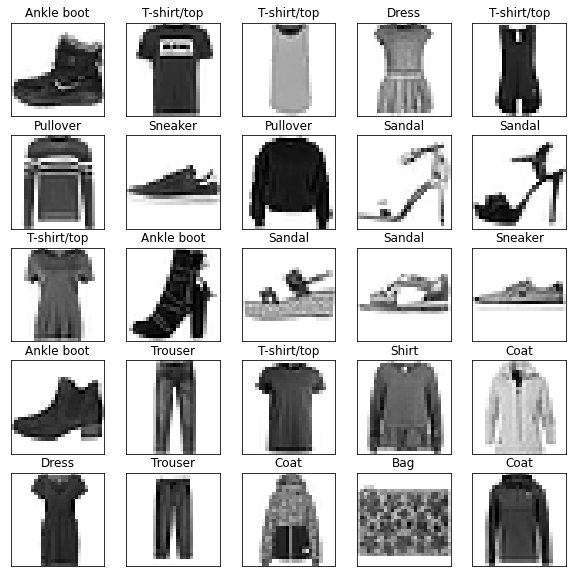

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]])
plt.show()

In [223]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.166666)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((50000, 28, 28), (10000, 28, 28), (50000,), (10000,))

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28x28 (the shape of one image) 
* Output shape = 10 (one per class of clothing)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()`
  * If your labels are one-hot encoded, `use CategoricalCrossentropy()`
  * If your labels are integer form use `SparseCategoricalCrossentropy()`
* Output layer activation = `Softmax` (not sigmoid)

In [ ]:
y_train[:10], tf.one_hot(y_train[:10], depth=10) # depth is the number of category we have 

(array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8),
 <tf.Tensor: shape=(10, 10), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>)

In [224]:
X_train = tf.constant(X_train)
X_val = tf.constant(X_val)
X_test = tf.constant(X_test)

y_train = tf.one_hot(y_train, depth=10)
y_val = tf.one_hot(y_val, depth=10)
y_test = tf.one_hot(y_test, depth=10)

### First try

In [225]:
tf.random.set_seed(0)

model_7 = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(32, activation="relu"),
                tf.keras.layers.Dense(32, activation="relu"),
                tf.keras.layers.Dense(10, activation="softmax")
            ])

model_7.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer="adam",
                metrics=["accuracy"])

model_7.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 32)                25120     
                                                                 
 dense_41 (Dense)            (None, 32)                1056      
                                                                 
 dense_42 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


**Here each pixel is considered as a features**

In [ ]:
history_7 = model_7.fit(X_train, y_train, epochs=20, validation_data=[X_val, y_val], verbose=1)

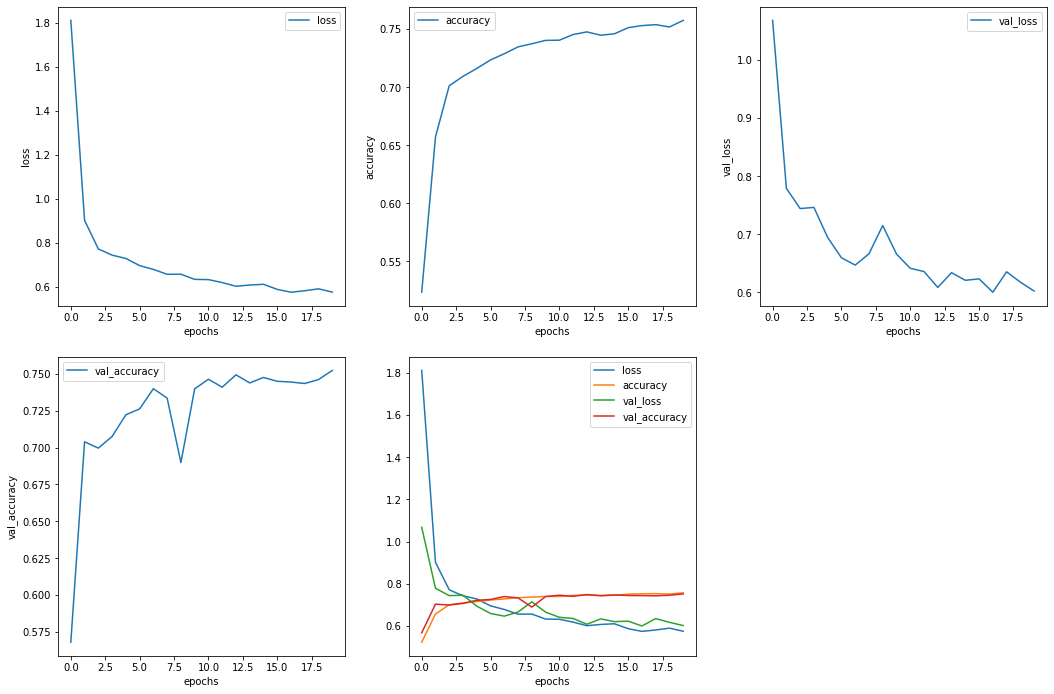

In [227]:
plot_history(history_7)

In [228]:
score_7 = model_7.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6208 - accuracy: 0.7470


### Normalizing our data
Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [203]:
tf.reduce_max(X_train).numpy(), tf.reduce_min(X_train).numpy()

(255, 0)

In [229]:
X_train_normal = X_train/255
X_val_normal = X_val/255
X_test_normal = X_test/255

In [ ]:
tf.random.set_seed(0)

model_8 = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(32, activation="relu"),
                tf.keras.layers.Dense(32, activation="relu"),
                tf.keras.layers.Dense(10, activation="softmax")
            ])

model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer="adam",
                metrics=["accuracy"])

history_8 = model_8.fit(X_train_normal, y_train, 
                        epochs=20, 
                        validation_data=[X_val_normal, y_val], 
                        verbose=1)

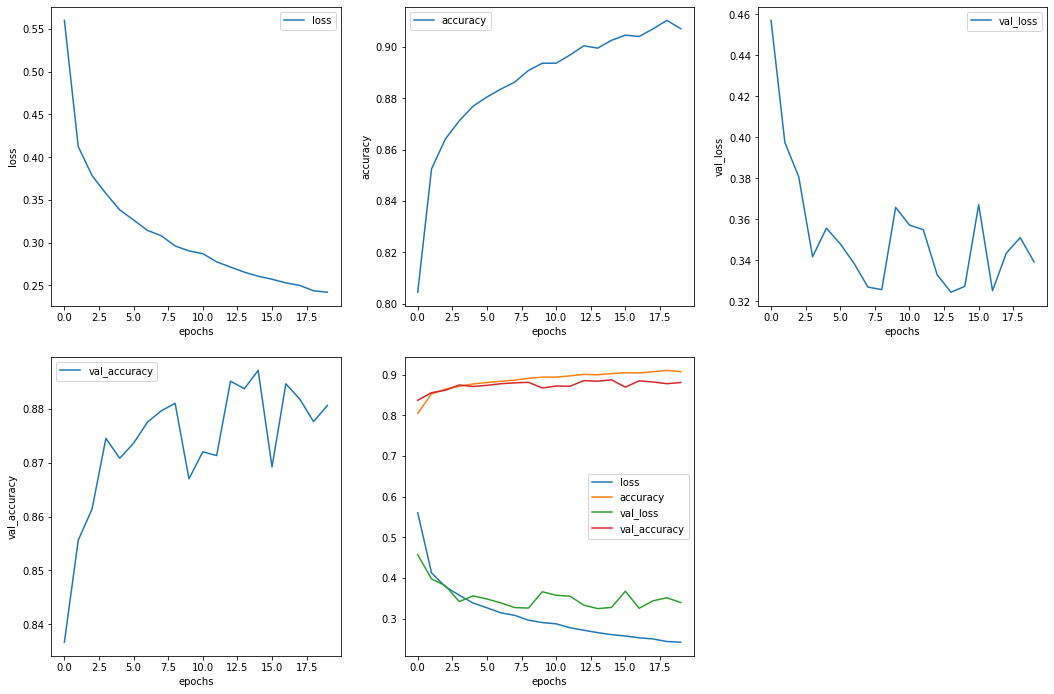

In [213]:
plot_history(history_8)

In [230]:
score_8 = model_8.evaluate(X_test_normal, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8731


In [236]:
scores = [[False, score_7[1]],
          [True, score_8[1]]]

print("improvement :", f"{score_8[1]/score_7[1]*100 - 100:.2f}%")

pd.DataFrame(scores, columns=["Normalisation", "score"])

improvement : 16.88%


,Normalisation,score
0,False,0.7470
1,True,0.8731


### Finding the ideal learning rate

In [ ]:
tf.random.set_seed(0)

model_9 = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(32, activation="relu"),
                tf.keras.layers.Dense(32, activation="relu"),
                tf.keras.layers.Dense(10, activation="softmax")
            ])

model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer="adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_9 = model_9.fit(X_train_normal, y_train, 
                        epochs=20, 
                        validation_data=[X_val_normal, y_val], 
                        callbacks=[lr_scheduler],
                        verbose=1)

Text(0.5, 1.0, 'Finding the ideal learning rate')

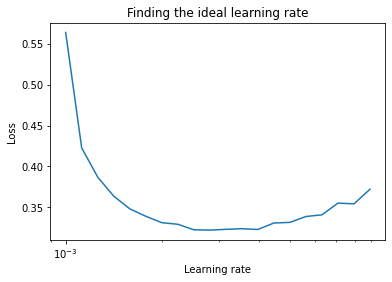

In [245]:
lrs = 1e-3 * (10**(tf.range(20)/20))
df = pd.DataFrame(history_9.history)
plt.semilogx(lrs, df.loss)
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [255]:
best_lr = 3 * 1e-3 # approximatively
best_lr

0.003

### Test the same model with the new learning rate

In [ ]:
tf.random.set_seed(0)

model_10 = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(32, activation="relu"),
                tf.keras.layers.Dense(32, activation="relu"),
                tf.keras.layers.Dense(10, activation="softmax")
            ])

model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                metrics=["accuracy"])

history_10 = model_10.fit(X_train_normal, y_train, 
                        epochs=20,
                        validation_data=[X_val_normal, y_val], 
                        verbose=1)

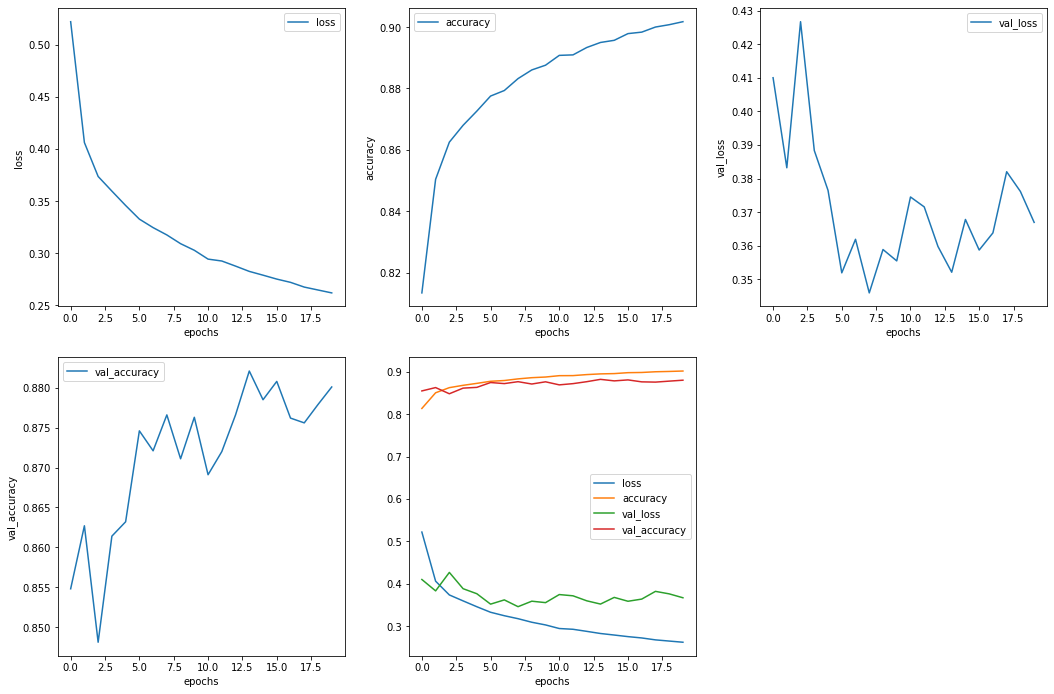

In [251]:
plot_history(history_10)

In [253]:
score_10 = model_10.evaluate(X_test_normal, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3976 - accuracy: 0.8720


In [256]:
scores = [[False, score_7[1], 0.001],
          [True, score_8[1], 0.001],
          [True, score_10[1], best_lr]]

print("improvement :", f"{score_10[1]/score_8[1]*100 - 100:.2f}%")

pd.DataFrame(scores, columns=["Normalisation", "score", "learning rate"])

improvement : -0.13%


,Normalisation,score,learning rate
0,False,0.7470,0.001
1,True,0.8731,0.001
2,True,0.8720,0.003


## Evaluating our multi-class classification model

To evlauate our multi-class classification model we could:
* Evalaute its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecutre)
* Save and export it for use in an application


In [321]:
def plot_confusion_matrix_multiclass(cf_matrix, class_names, cmap="Accent_r", cbar=False, figsize=None):

    n = len(cf_matrix)
    size = np.sum(cf_matrix)

    group_counts = [f"{value:.0f}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2%}" for value in (cf_matrix/np.sum(cf_matrix,axis=1)).flatten()]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.array(labels).reshape(n,n)

    if figsize is not None : 
        plt.figure(figsize=figsize)
    ax = sns.heatmap(cf_matrix, annot=labels, cmap=cmap, cbar=cbar, fmt="")

    ax.set_title(f'Confusion Matrix, size:{size} \n', weight="bold", fontsize="xx-large");
    ax.set_xlabel('\n Predicted Values', weight="bold", fontsize="x-large")
    ax.set_ylabel('True Values ', weight="bold", fontsize="x-large");

    ax.xaxis.set_ticklabels(class_names, weight="bold")
    ax.yaxis.set_ticklabels(class_names, weight="bold")

    plt.show()

In [298]:
y_pred = model_10.predict(X_test_normal)
y_pred = tf.argmax(y_pred, axis=1)
y_pred.numpy()[:5]

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, 1, 6])

In [299]:
y_true = tf.argmax(y_test, axis=1)
y_true.numpy()[:5]

array([9, 2, 1, 1, 6])

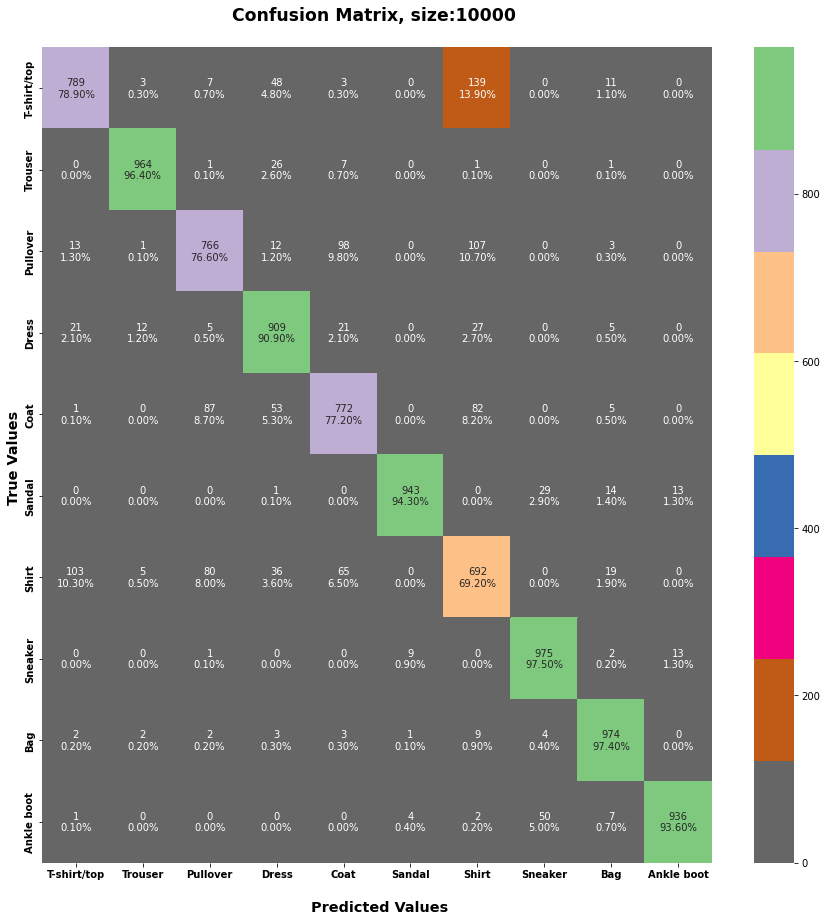

In [322]:
from sklearn.metrics import confusion_matrix

cf_matrix_10 = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(15,15))
plot_confusion_matrix_multiclass(cf_matrix_10, class_names, cbar=True)

In [324]:
np.mean(y_true == y_pred)

0.872

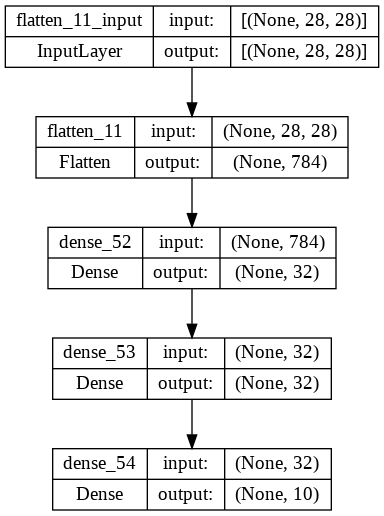

In [323]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_10, show_shapes=True)